Index(['#node1', 'node2', 'node1_string_id', 'node2_string_id',
       'neighborhood_on_chromosome', 'gene_fusion',
       'phylogenetic_cooccurrence', 'homology', 'coexpression',
       'experimentally_determined_interaction', 'database_annotated',
       'automated_textmining', 'combined_score'],
      dtype='object')


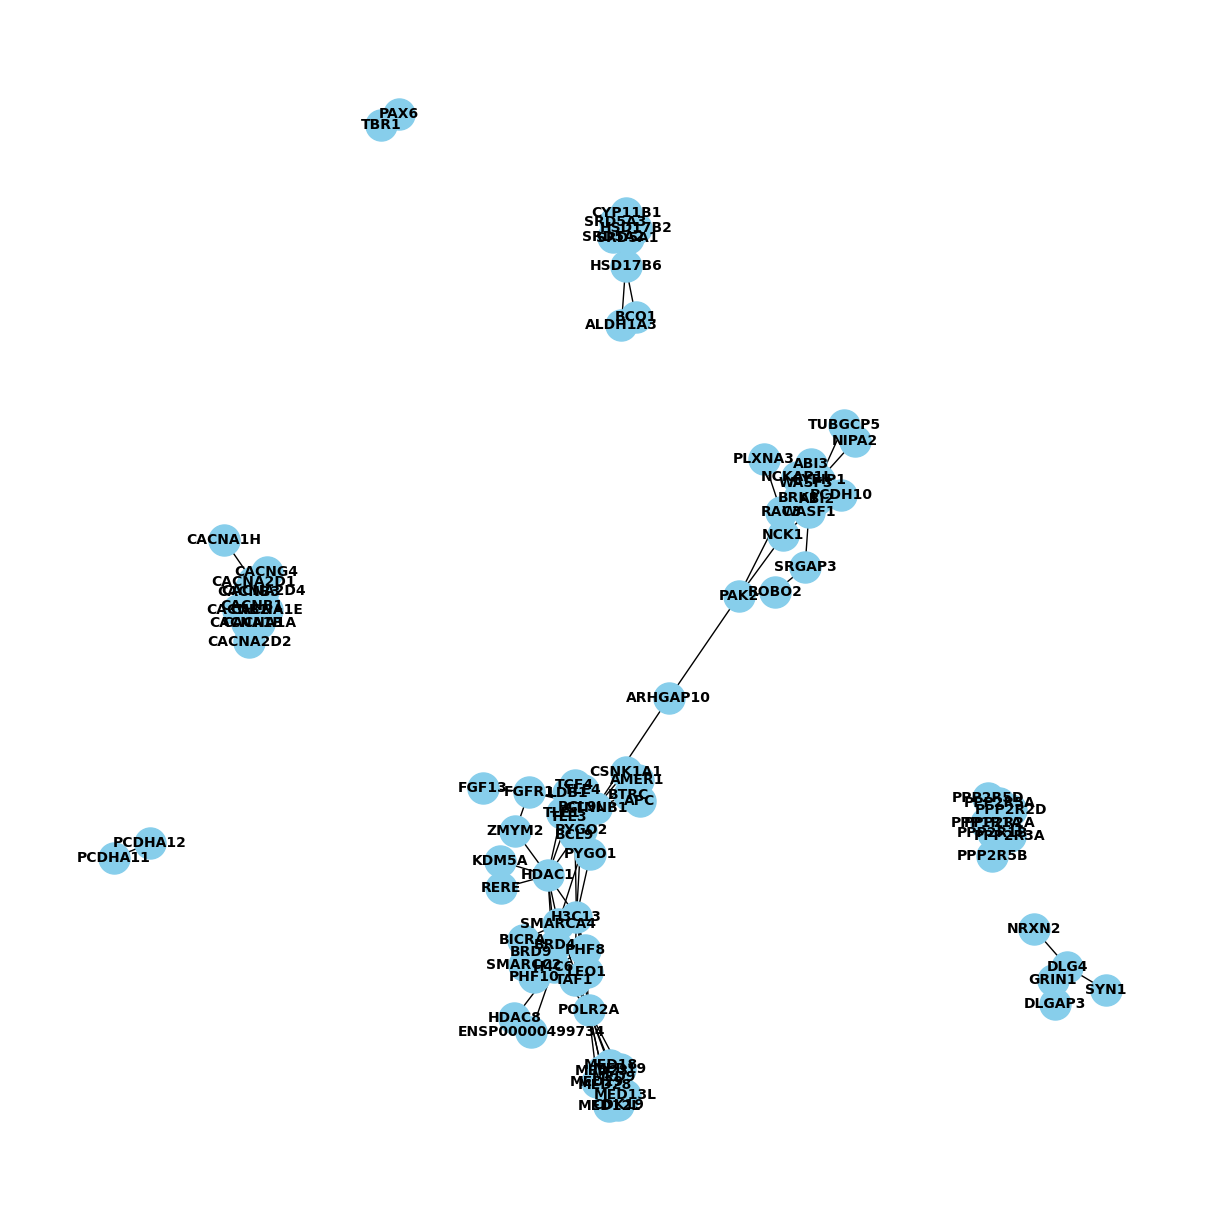

Top 10 nodes by Degree Centrality:
         Degree Centrality  Betweenness Centrality  Closeness Centrality
CTNNB1            0.178947                0.221905              0.245920
POLR2A            0.126316                0.102718              0.197001
H4C6              0.126316                0.042826              0.199142
H3C13             0.115789                0.043939              0.202443
CYFIP1            0.115789                0.033734              0.130865
HDAC1             0.105263                0.059929              0.218108
SMARCA4           0.105263                0.113540              0.230453
WASF1             0.105263                0.012010              0.130865
BCL9              0.105263                0.009707              0.207018
TLE1              0.094737                0.002121              0.194905
Top 10 nodes by Betweenness Centrality:
          Degree Centrality  Betweenness Centrality  Closeness Centrality
CTNNB1             0.178947                0.221

In [ ]:
# Install necessary packages
!pip install pandas networkx

# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '151string.csv.csv'  # Update this with the correct path to your file
df = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the actual column names to confirm
print(df.columns)

# Correct column names based on your inspection
df.columns = ['#node1', 'node2', 'node1_string_id', 'node2_string_id',
              'neighborhood_on_chromosome', 'gene_fusion', 'phylogenetic_cooccurrence',
              'homology', 'coexpression', 'experimentally_determined_interaction',
              'database_annotated', 'automated_textmining', 'combined_score']

# Now construct the graph
G = nx.from_pandas_edgelist(df, '#node1', 'node2', edge_attr=True)

# Visualize the graph (optional, for understanding)
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold")
plt.show()

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Combine centrality measures into a DataFrame
centrality_df = pd.DataFrame({
    'Degree Centrality': pd.Series(degree_centrality),
    'Betweenness Centrality': pd.Series(betweenness_centrality),
    'Closeness Centrality': pd.Series(closeness_centrality)
})

# Display the centrality measures
centrality_df.head()

# Rank nodes by centrality measures and identify top 10
top_10_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)
top_10_betweenness = centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(10)
top_10_closeness = centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(10)

print("Top 10 nodes by Degree Centrality:")
print(top_10_degree)

print("Top 10 nodes by Betweenness Centrality:")
print(top_10_betweenness)

print("Top 10 nodes by Closeness Centrality:")
print(top_10_closeness)
